## ISYE6501x Homework 6


### Question 9.1

Using the same crime data set uscrime.txt as in Question 8.2, apply Principal Component Analysis
and then create a regression model using the first few principal components. Specify your new model in terms of the original variables (not the principal components), and compare its quality to that of your solution to Question 8.2. You can use the R function prcomp for PCA. (Note that to first scale the data,you can include scale. = TRUE to scale as part of the PCA function. Don’t forget that, to make a prediction for the new city, you’ll need to unscale the coefficients (i.e., do the scaling calculation in reverse)!)

In [1]:
#data point to make prediction on
test<-data.frame(M = 14.0,So = 0,Ed = 10.0, Po1 = 12.0,Po2 = 15.5,
                 LF = 0.640, M.F = 94.0,Pop = 150,NW = 1.1,U1 = 0.120,
                 U2 = 3.6, Wealth = 3200,Ineq = 20.1,Prob = 0.04, Time = 39.0)

## Loading Libraries

In [2]:
options(warn=-1)

In [3]:
install.packages("BBmisc")

Installing package into 'C:/Users/fayal/R/win-library/3.6'
(as 'lib' is unspecified)



package 'BBmisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\fayal\AppData\Local\Temp\RtmpU31wmU\downloaded_packages


In [4]:
library(BBmisc)


Attaching package: 'BBmisc'


The following object is masked from 'package:base':

    isFALSE




In [5]:
library(ggplot2)

In [6]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
v purrr   0.3.3     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::coalesce() masks BBmisc::coalesce()
x dplyr::collapse() masks BBmisc::collapse()
x dplyr::filter()   masks stats::filter()
x dplyr::lag()      masks stats::lag()



In [7]:
library(caret)

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift




### Loading Data

In [8]:
#loading data
crime=read_tsv("uscrime.txt")

Parsed with column specification:
cols(
  M = col_double(),
  So = col_double(),
  Ed = col_double(),
  Po1 = col_double(),
  Po2 = col_double(),
  LF = col_double(),
  M.F = col_double(),
  Pop = col_double(),
  NW = col_double(),
  U1 = col_double(),
  U2 = col_double(),
  Wealth = col_double(),
  Ineq = col_double(),
  Prob = col_double(),
  Time = col_double(),
  Crime = col_double()
)



Criminologists are interested in the effect of punishment regimes on crime rates. This has been studied using aggregate data on 47 states of the USA for 1960. The data set contains the following columns:

    Variable   Description
    M		percentage of males aged 14–24 in total state population
    So		indicator variable for a southern state
    Ed		mean years of schooling of the population aged 25 years or over
    Po1		per capita expenditure on police protection in 1960
    Po2		per capita expenditure on police protection in 1959
    LF		labour force participation rate of civilian urban males in the age-group 14-24
    M.F		number of males per 100 females
    Pop		state population in 1960 in hundred thousands
    NW		percentage of nonwhites in the population
    U1		unemployment rate of urban males 14–24
    U2		unemployment rate of urban males 35–39
    Wealth	wealth: median value of transferable assets or family income
    Ineq	income inequality: percentage of families earning below half the median income
    Prob	probability of imprisonment: ratio of number of commitments to number of offenses
    Time	average time in months served by offenders in state prisons before their first release
    Crime		crime rate: number of offenses per 100,000 population in 1960

In [9]:
#checking the data
head(crime)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


In [10]:
#Looking at the structure of data
str(crime)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	47 obs. of  16 variables:
 $ M     : num  15.1 14.3 14.2 13.6 14.1 12.1 12.7 13.1 15.7 14 ...
 $ So    : num  1 0 1 0 0 0 1 1 1 0 ...
 $ Ed    : num  9.1 11.3 8.9 12.1 12.1 11 11.1 10.9 9 11.8 ...
 $ Po1   : num  5.8 10.3 4.5 14.9 10.9 11.8 8.2 11.5 6.5 7.1 ...
 $ Po2   : num  5.6 9.5 4.4 14.1 10.1 11.5 7.9 10.9 6.2 6.8 ...
 $ LF    : num  0.51 0.583 0.533 0.577 0.591 0.547 0.519 0.542 0.553 0.632 ...
 $ M.F   : num  95 101.2 96.9 99.4 98.5 ...
 $ Pop   : num  33 13 18 157 18 25 4 50 39 7 ...
 $ NW    : num  30.1 10.2 21.9 8 3 4.4 13.9 17.9 28.6 1.5 ...
 $ U1    : num  0.108 0.096 0.094 0.102 0.091 0.084 0.097 0.079 0.081 0.1 ...
 $ U2    : num  4.1 3.6 3.3 3.9 2 2.9 3.8 3.5 2.8 2.4 ...
 $ Wealth: num  3940 5570 3180 6730 5780 6890 6200 4720 4210 5260 ...
 $ Ineq  : num  26.1 19.4 25 16.7 17.4 12.6 16.8 20.6 23.9 17.4 ...
 $ Prob  : num  0.0846 0.0296 0.0834 0.0158 0.0414 ...
 $ Time  : num  26.2 25.3 24.3 29.9 21.3 ...
 $ Crime 

In [11]:
#correlation matrix
cor(crime[-16])

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time
M,1.00000000,0.58435534,-0.53023964,-0.50573690,-0.51317336,-0.1609488,-0.02867993,-0.28063762,0.59319826,-0.224380599,-0.24484339,-0.6700550558,0.63921138,0.361116408,0.1145107190
So,0.58435534,1.00000000,-0.70274132,-0.37263633,-0.37616753,-0.5054695,-0.31473291,-0.04991832,0.76710262,-0.172419305,0.07169289,-0.6369454328,0.73718106,0.530861993,0.0668128312
Ed,-0.53023964,-0.70274132,1.00000000,0.48295213,0.49940958,0.5611780,0.43691492,-0.01722740,-0.66488190,0.018103454,-0.21568155,0.7359970363,-0.76865789,-0.389922862,-0.2539735471
Po1,-0.50573690,-0.37263633,0.48295213,1.00000000,0.99358648,0.1214932,0.03376027,0.52628358,-0.21370878,-0.043697608,0.18509304,0.7872252807,-0.63050025,-0.473247036,0.1033577449
Po2,-0.51317336,-0.37616753,0.49940958,0.99358648,1.00000000,0.1063496,0.02284250,0.51378940,-0.21876821,-0.051711989,0.16922422,0.7942620503,-0.64815183,-0.473027293,0.0756266536
LF,-0.16094882,-0.50546948,0.56117795,0.12149320,0.10634960,1.0000000,0.51355879,-0.12367222,-0.34121444,-0.229399684,-0.42076249,0.2946323090,-0.26988646,-0.250086098,-0.1236404364
M.F,-0.02867993,-0.31473291,0.43691492,0.03376027,0.02284250,0.5135588,1.00000000,-0.41062750,-0.32730454,0.351891900,-0.01869169,0.1796086363,-0.16708869,-0.050858258,-0.4276973791
Pop,-0.28063762,-0.04991832,-0.01722740,0.52628358,0.51378940,-0.1236722,-0.41062750,1.00000000,0.09515301,-0.038119948,0.27042159,0.3082627091,-0.12629357,-0.347289063,0.4642104596
NW,0.59319826,0.76710262,-0.66488190,-0.21370878,-0.21876821,-0.3412144,-0.32730454,0.09515301,1.00000000,-0.156450020,0.08090829,-0.5901070652,0.67731286,0.428059153,0.2303984071
U1,-0.22438060,-0.17241931,0.01810345,-0.04369761,-0.05171199,-0.2293997,0.35189190,-0.03811995,-0.15645002,1.000000000,0.74592482,0.0448572017,-0.06383218,-0.007469032,-0.1698528383


---------------------------------------------------------------------------------------------------------------------
Looking at correlation matrix above, we can see that many variables are correlated and some are highly correlated.

When doing regression, if regressors(predictors) are correlated,or simply put multicollinearity exists, it is going to impact the prediction and output response.

Predictors are independent variables and should be independent(uncorrelated). The higher the correlation, the bigger impact it has on fitting the model and interpreting the results.

One way to approach this problem is transforming predictors such that predictos are uncorrelated. 

We will use principal component analysis to take originial variables and create new variables called principal components.

These PCs are :
- linear combinations of the original variables
- uncorrelated
- each PC explains the maximum amount of variation in the original X matrix. 

We can take only the first few PCs that explain some large percentage of the variation in the original matrix and reduce the number of variables to analyze. 

###  Principal Component Analysis 

A principal component is a normalized linear combination of the original predictors in a data set.First principal component is a linear combination of original predictor variables which captures the maximum variance in the data set. It determines the direction of highest variability in the data.

In [12]:
set.seed(0)
crime_pca<-prcomp(crime[,-16],center=TRUE,scale. = TRUE)

In [13]:
summary(crime_pca)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.4534 1.6739 1.4160 1.07806 0.97893 0.74377 0.56729
Proportion of Variance 0.4013 0.1868 0.1337 0.07748 0.06389 0.03688 0.02145
Cumulative Proportion  0.4013 0.5880 0.7217 0.79920 0.86308 0.89996 0.92142
                           PC8     PC9    PC10    PC11    PC12    PC13   PC14
Standard deviation     0.55444 0.48493 0.44708 0.41915 0.35804 0.26333 0.2418
Proportion of Variance 0.02049 0.01568 0.01333 0.01171 0.00855 0.00462 0.0039
Cumulative Proportion  0.94191 0.95759 0.97091 0.98263 0.99117 0.99579 0.9997
                          PC15
Standard deviation     0.06793
Proportion of Variance 0.00031
Cumulative Proportion  1.00000

We obtain 15 principal components. Each of these explains a percentage of the total variation in the dataset. PC1 explains 40% of the total variance and  PC2 and PC3 explain roughly 19% and 13% of the variance. So, by knowing the position of a sample/observation in relation to just PC1, PC2 and PC3, we can get a very accurate view on where it stands in relation to other samples, as just PC1,PC2 and PC3 can explain 72% of the variance. If we would like to do dimnesion reduction, and choosing components that captures 90% of variance in data works for us, then we can select the first 6 principal components in our analysis.

In [14]:
str(crime_pca)

List of 5
 $ sdev    : num [1:15] 2.453 1.674 1.416 1.078 0.979 ...
 $ rotation: num [1:15, 1:15] -0.304 -0.331 0.34 0.309 0.311 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:15] "M" "So" "Ed" "Po1" ...
  .. ..$ : chr [1:15] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:15] 13.86 0.34 10.56 8.5 8.02 ...
  ..- attr(*, "names")= chr [1:15] "M" "So" "Ed" "Po1" ...
 $ scale   : Named num [1:15] 1.257 0.479 1.119 2.972 2.796 ...
  ..- attr(*, "names")= chr [1:15] "M" "So" "Ed" "Po1" ...
 $ x       : num [1:47, 1:15] -4.2 1.17 -4.17 3.83 1.84 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:15] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [15]:
names(crime_pca)

[1] "sdev"     "rotation" "center"   "scale"    "x"

The rotation matrix returns the loadings of each original variable onto each PC. These loadings are basically the coefficients or **eigen vectors** to the linear combinations of the original variables for each PC:

In [16]:
crime_pca$rotation#linear transfomration of original variables to principal components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
M,-0.30371194,0.06280357,0.1724199946,-0.02035537,-0.35832737,-0.449132706,-0.15707378,-0.55367691,0.15474793,-0.01443093,0.39446657,0.16580189,-0.05142365,0.04901705,0.0051398012
So,-0.33088129,-0.15837219,0.0155433104,0.29247181,-0.12061130,-0.100500743,0.19649727,0.22734157,-0.65599872,0.06141452,0.23397868,-0.05753357,-0.29368483,-0.29364512,0.0084369230
Ed,0.33962148,0.21461152,0.0677396249,0.07974375,-0.02442839,-0.008571367,-0.23943629,-0.14644678,-0.44326978,0.51887452,-0.11821954,0.47786536,0.19441949,0.03964277,-0.0280052040
Po1,0.30863412,-0.26981761,0.0506458161,0.33325059,-0.23527680,-0.095776709,0.08011735,0.04613156,0.19425472,-0.14320978,-0.13042001,0.22611207,-0.18592255,-0.09490151,-0.6894155129
Po2,0.31099285,-0.26396300,0.0530651173,0.35192809,-0.20473383,-0.119524780,0.09518288,0.03168720,0.19512072,-0.05929780,-0.13885912,0.19088461,-0.13454940,-0.08259642,0.7200270100
LF,0.17617757,0.31943042,0.2715301768,-0.14326529,-0.39407588,0.504234275,-0.15931612,0.25513777,0.14393498,0.03077073,0.38532827,0.02705134,-0.27742957,-0.15385625,0.0336823193
M.F,0.11638221,0.39434428,-0.2031621598,0.01048029,-0.57877443,-0.074501901,0.15548197,-0.05507254,-0.24378252,-0.35323357,-0.28029732,-0.23925913,0.31624667,-0.04125321,0.0097922075
Pop,0.11307836,-0.46723456,0.0770210971,-0.03210513,-0.08317034,0.547098563,0.09046187,-0.59078221,-0.20244830,-0.03970718,0.05849643,-0.18350385,0.12651689,-0.05326383,0.0001496323
NW,-0.29358647,-0.22801119,0.0788156621,0.23925971,-0.36079387,0.051219538,-0.31154195,0.20432828,0.18984178,0.49201966,-0.20695666,-0.36671707,0.22901695,0.13227774,-0.0370783671
U1,0.04050137,0.00807439,-0.6590290980,-0.18279096,-0.13136873,0.017385981,-0.17354115,-0.20206312,0.02069349,0.22765278,-0.17857891,-0.09314897,-0.59039450,-0.02335942,0.0111359325


----------------------------------------------------------------------------------------------------------------------------
Out of curosity, we can normalize the X matrix (original variables), and find eigen vectors of XT * X.(see codes below.)
Comparing it to rotation matrix, we can see they are the same, that is to say rotation matrix is eigen vector matrix sorted by eigne values.


In [17]:
x_mtx<-crime[-16]
x_norm<-normalize(x_mtx)
x_t<-t(x_norm)

In [18]:
eigen(as.matrix(x_t)%*%as.matrix(x_norm))$vectors

-0.30371194,0.06280357,-0.1724199946,0.02035537,-0.35832737,0.449132706,0.15707378,0.55367691,0.15474793,0.01443093,0.39446657,0.16580189,-0.05142365,0.04901705,0.0051398012
-0.33088129,-0.15837219,-0.0155433104,-0.29247181,-0.12061130,0.100500743,-0.19649727,-0.22734157,-0.65599872,-0.06141452,0.23397868,-0.05753357,-0.29368483,-0.29364512,0.0084369230
0.33962148,0.21461152,-0.0677396249,-0.07974375,-0.02442839,0.008571367,0.23943629,0.14644678,-0.44326978,-0.51887452,-0.11821954,0.47786536,0.19441949,0.03964277,-0.0280052040
0.30863412,-0.26981761,-0.0506458161,-0.33325059,-0.23527680,0.095776709,-0.08011735,-0.04613156,0.19425472,0.14320978,-0.13042001,0.22611207,-0.18592255,-0.09490151,-0.6894155129
0.31099285,-0.26396300,-0.0530651173,-0.35192809,-0.20473383,0.119524780,-0.09518288,-0.03168720,0.19512072,0.05929780,-0.13885912,0.19088461,-0.13454940,-0.08259642,0.7200270100
0.17617757,0.31943042,-0.2715301768,0.14326529,-0.39407588,-0.504234275,0.15931612,-0.25513777,0.14393498,-0.03077073,0.38532827,0.02705134,-0.27742957,-0.15385625,0.0336823193
0.11638221,0.39434428,0.2031621598,-0.01048029,-0.57877443,0.074501901,-0.15548197,0.05507254,-0.24378252,0.35323357,-0.28029732,-0.23925913,0.31624667,-0.04125321,0.0097922075
0.11307836,-0.46723456,-0.0770210971,0.03210513,-0.08317034,-0.547098563,-0.09046187,0.59078221,-0.20244830,0.03970718,0.05849643,-0.18350385,0.12651689,-0.05326383,0.0001496323
-0.29358647,-0.22801119,-0.0788156621,-0.23925971,-0.36079387,-0.051219538,0.31154195,-0.20432828,0.18984178,-0.49201966,-0.20695666,-0.36671707,0.22901695,0.13227774,-0.0370783671
0.04050137,0.00807439,0.6590290980,0.18279096,-0.13136873,-0.017385981,0.17354115,0.20206312,0.02069349,-0.22765278,-0.17857891,-0.09314897,-0.59039450,-0.02335942,0.0111359325
0.01812228,-0.27971336,0.5785006293,0.06889312,-0.13499487,-0.048155286,0.07526787,-0.24369650,0.05576010,0.04750100,0.47021842,0.28440496,0.43292853,-0.03985736,0.0073618948


--------------------------------------------------------------------------------------------------------------------------------
Prcomp() also returns the “rotated” X matrix, which is the inner product between each observation and the loading(eigen vector) for each PC. For example, first data point is a vector with 1x15 dimension, and V1 is first eigen vector with dimension of 15x1. The inner product of these two results in the transformed variable (now PC1 for that observation) with dimnesion of 1x1 (a scalar). 

In [19]:
crime_pca$x[1:5,] #variables are transformed to pcs that are uncorrelated, and now we can use these new (transformed) 
#data points to do regression (X*V)

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
-4.199284,-1.0938312,-1.11907395,0.67178115,0.05528338,0.3073383,-0.56640816,-0.007801727,0.22350995,0.45274365,-0.08474542,0.22096639,-0.11261680,0.3269649,0.02338401
1.172663,0.6770136,-0.05244634,-0.08350709,-1.17319982,-0.5832373,0.19561119,0.154566472,0.43677720,0.21208589,-0.03391661,0.35686524,0.29751651,0.2523567,-0.06076368
-4.173725,0.2767750,-0.37107658,0.37793995,0.54134525,0.7187223,0.10330693,0.351138883,0.06299232,-0.06719022,-0.48149156,-0.04701948,0.05216054,-0.4865511,0.04211750
3.834962,-2.5769060,0.22793998,0.38262331,-1.64474650,0.7294884,0.26699499,-1.547460841,-0.37954181,0.22922305,0.10984951,0.17727101,0.08838131,0.1496784,0.02917497
1.839300,1.3309856,1.27882805,0.71814305,0.04159032,-0.3940902,0.07050766,-0.543237437,0.22463245,0.47769084,-0.32958186,0.41807551,-0.72215224,0.1310272,-0.07514940


--------------------------------------------------------------------
Confirming the fact that these new variables are uncorrelated:

In [20]:
cor(crime_pca$x)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
PC1,1.000000e+00,-2.498724e-16,1.406759e-16,-8.774248e-17,-2.665258e-17,-2.204508e-16,-4.891197e-16,-7.202567e-16,1.091212e-15,-8.742206e-18,-1.388061e-15,1.222116e-15,6.219244e-16,1.386020e-15,-1.372095e-16
PC2,-2.498724e-16,1.000000e+00,2.292147e-16,3.304066e-16,-7.271976e-17,-6.523514e-16,7.681567e-16,3.497698e-16,2.124345e-16,-5.941170e-16,-1.862286e-17,4.683128e-16,2.476219e-16,-6.321437e-16,-6.355398e-15
PC3,1.406759e-16,2.292147e-16,1.000000e+00,-6.990114e-17,-1.217264e-16,5.609356e-17,-1.896407e-16,-3.223738e-16,-2.662930e-16,-1.782712e-17,7.792568e-16,-6.088417e-17,7.907746e-17,4.081716e-17,2.121159e-15
PC4,-8.774248e-17,3.304066e-16,-6.990114e-17,1.000000e+00,3.805244e-16,-1.950527e-16,4.758753e-16,-1.952979e-16,-7.781812e-16,5.990215e-16,7.802394e-16,3.114388e-17,5.810139e-16,2.350854e-18,-1.991797e-16
PC5,-2.665258e-17,-7.271976e-17,-1.217264e-16,3.805244e-16,1.000000e+00,1.937897e-16,-1.511902e-16,-3.173382e-16,7.651916e-16,-2.782724e-16,4.849592e-18,2.640809e-16,-7.449419e-16,4.574904e-16,-2.558480e-15
PC6,-2.204508e-16,-6.523514e-16,5.609356e-17,-1.950527e-16,1.937897e-16,1.000000e+00,1.221846e-16,2.931704e-16,1.927874e-16,-2.797224e-16,-6.417124e-16,1.489079e-16,3.999710e-16,8.298120e-16,2.846300e-15
PC7,-4.891197e-16,7.681567e-16,-1.896407e-16,4.758753e-16,-1.511902e-16,1.221846e-16,1.000000e+00,-3.566736e-16,6.344743e-16,4.817949e-17,-4.442442e-16,1.203654e-16,1.027063e-16,-3.398855e-16,3.422227e-16
PC8,-7.202567e-16,3.497698e-16,-3.223738e-16,-1.952979e-16,-3.173382e-16,2.931704e-16,-3.566736e-16,1.000000e+00,4.969902e-16,-3.959905e-16,1.343111e-16,6.886858e-17,-1.927615e-16,5.065632e-16,-4.156596e-15
PC9,1.091212e-15,2.124345e-16,-2.662930e-16,-7.781812e-16,7.651916e-16,1.927874e-16,6.344743e-16,4.969902e-16,1.000000e+00,-1.662649e-15,-1.013329e-16,-7.530042e-17,-3.714909e-16,-2.452864e-16,4.670853e-17
PC10,-8.742206e-18,-5.941170e-16,-1.782712e-17,5.990215e-16,-2.782724e-16,-2.797224e-16,4.817949e-17,-3.959905e-16,-1.662649e-15,1.000000e+00,1.283457e-16,1.309529e-15,3.128737e-16,3.147977e-16,6.909476e-16


-----------------------------------------------------------------------------------------------------------------------------
As we can see in above correlation matrix, there is no correlation between principal components (all correlation except the diagonal ones are zero.)

### Preparing Test Data Point for Prediction

We can use predict() to transform the test data point for regression. This function takes care of scaling the data point and then returns the principal components for this observation.

In [21]:
test_pca<-predict(crime_pca,test)

In [22]:
test_pca

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
1.224044,-2.767641,0.533605,-1.146837,-1.206098,2.333343,-0.1535916,-1.391625,1.460274,-0.4525158,-0.3466498,1.663782,-1.811307,-2.174071,1.288675


-------------------------------------------------------------------------------------------------------------------------------
We can manually transform the original variables to principal components and compare. As we can see, they both result in same transformed values.

In [23]:
test_norm<-(test-sapply(crime[-16],mean))/sapply(crime[-16],sd)

In [24]:
as.matrix(test_norm)%*%as.matrix(crime_pca$rotation)

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
1.224044,-2.767641,0.533605,-1.146837,-1.206098,2.333343,-0.1535916,-1.391625,1.460274,-0.4525158,-0.3466498,1.663782,-1.811307,-2.174071,1.288675


### Visualizing PCs

In [25]:
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



The plot below shows how much variance is captured in each principal components:

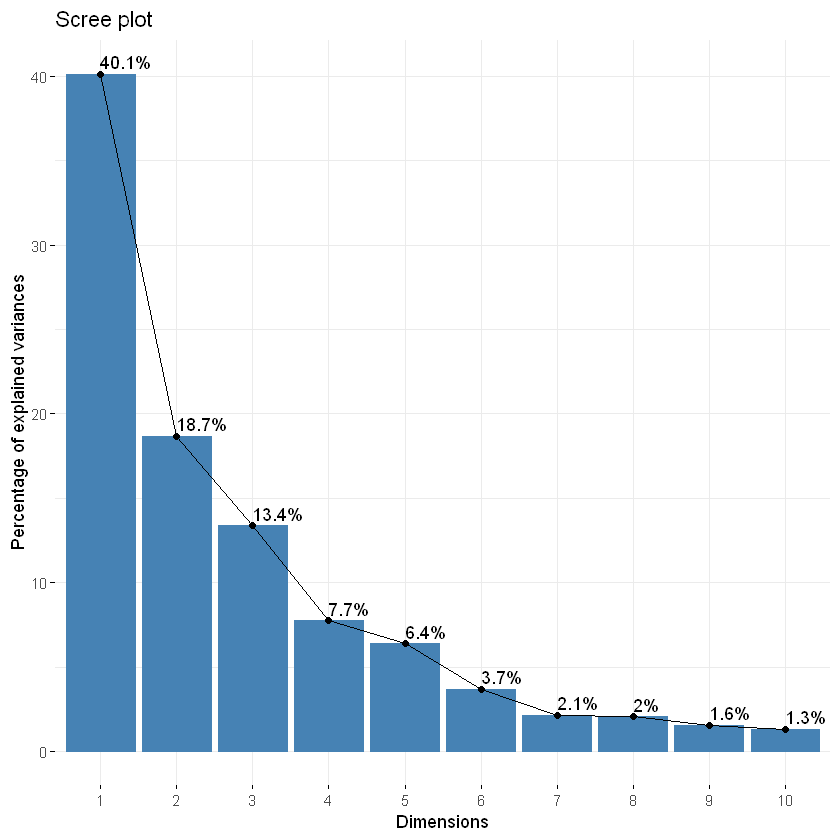

In [26]:
fviz_eig(crime_pca,addlabels=TRUE)

We can see the contribution of original variables in PC1 and PC2:

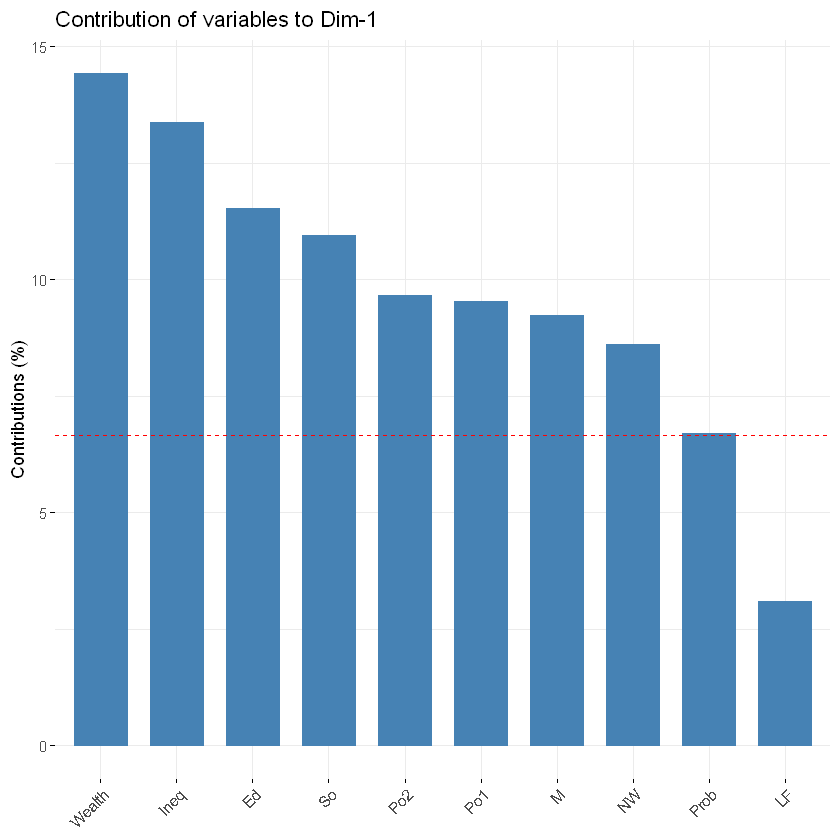

In [27]:
#Contributions of variables to PC1
fviz_contrib(crime_pca, choice = "var", axes = 1, top = 10)

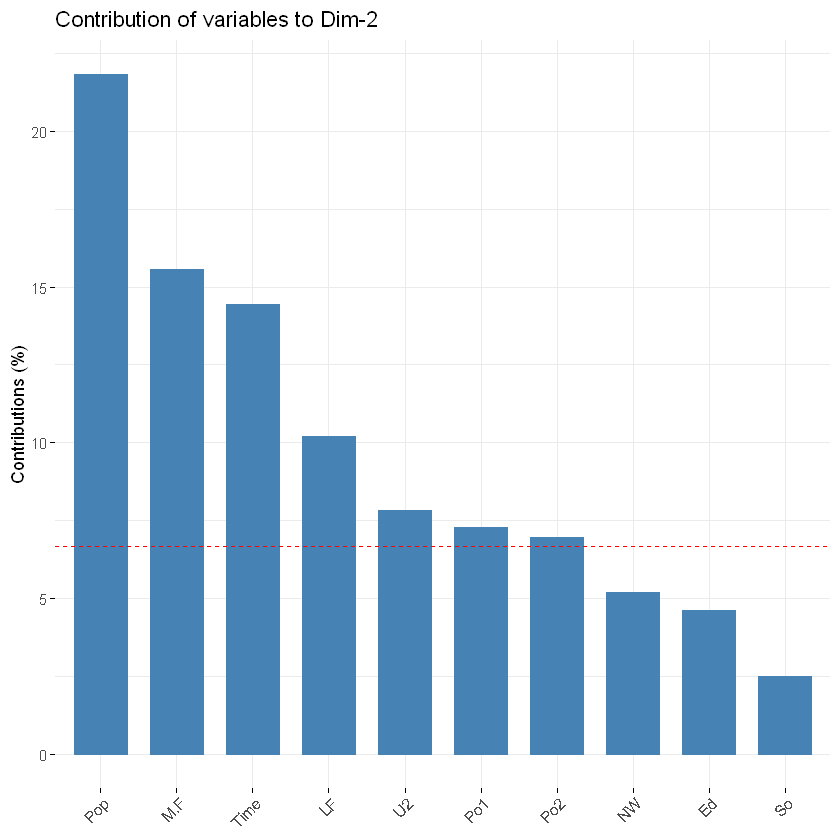

In [28]:
#Contributions of variables to PC2
fviz_contrib(crime_pca, choice = "var", axes = 2, top = 10)

If we had a categorical variable, such as low, medium and high crime states, we could establish some clusters here. Since, there is no labeled clusters in our data, we simply observe data points (states) that are similar to each other,based on their position. However, we must remember that PC1 and PC2 contain only 60% of variation and do not tell us the whole story hidden in data.

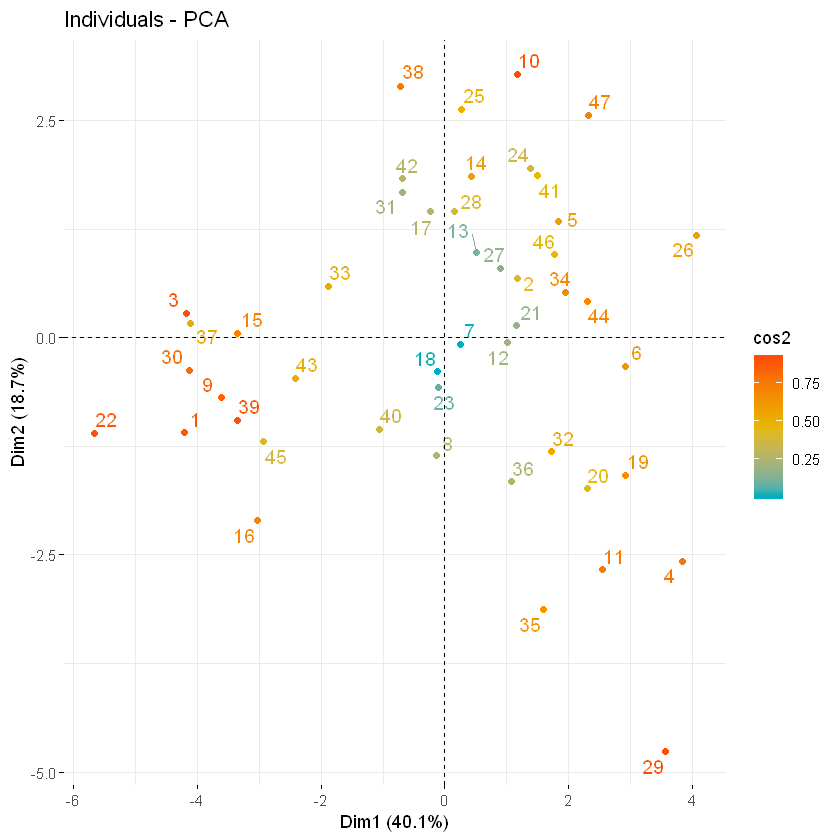

In [29]:
#graph of individuals
p<-fviz_pca_ind(crime_pca,
             col.ind = "cos2", #importance of a principal component for a given observation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping
             
             )
p

The test data point has PC1=1.2 and PC2=-2.7. If we look at the above graph, we can see the position of test observation is close to states 11,20 and 36.
Looking at crime rate of these states, we might guess that the estimation of crime rate of new state will be close to their range.

In [30]:
cat("State #36 Crime Rate:",crime$Crime[36],"\n","State #11 Crime Rate:",crime$Crime[11],"\n"
    ,"State #20 Crime Rate:",crime$Crime[20])

State #36 Crime Rate: 1272 
 State #11 Crime Rate: 1674 
 State #20 Crime Rate: 1225

The below visualization shows the weight of each variable in PCA transformation equation:

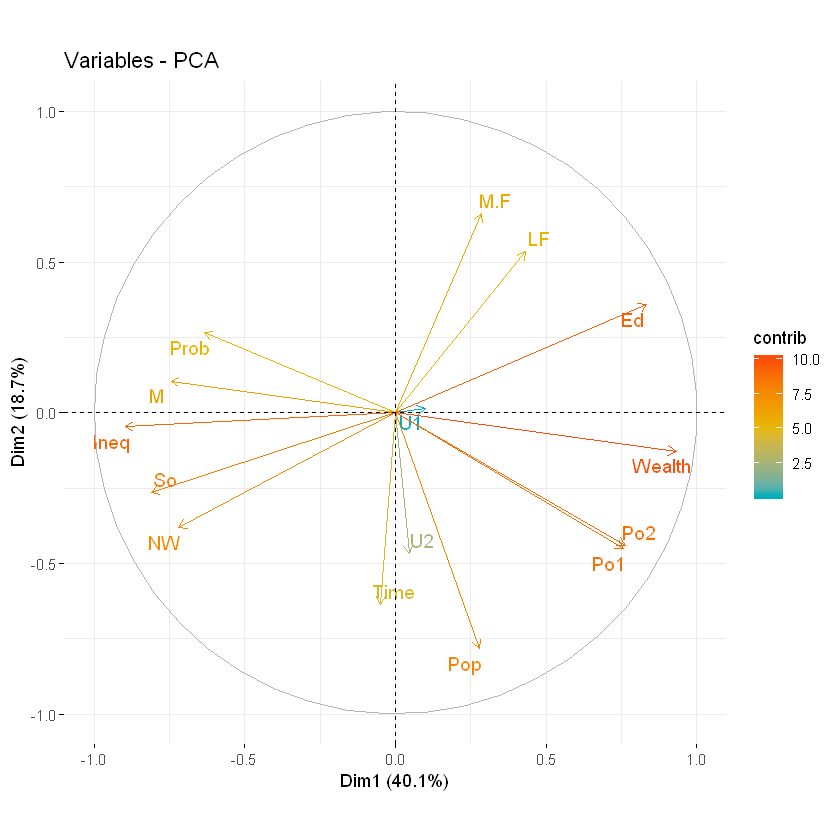

In [31]:
fviz_pca_var(crime_pca,
             col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
             )

### Principal component regression

In [32]:
crime_transformed <-cbind(data.frame(crime_pca$x),crime[,16])


In [33]:
head(crime_transformed)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,Crime
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-4.199284,-1.0938312,-1.11907395,0.67178115,0.05528338,0.3073383,-0.56640816,-0.007801727,0.22350995,0.45274365,-0.08474542,0.22096639,-0.11261680,0.3269649,0.02338401,791
2,1.172663,0.6770136,-0.05244634,-0.08350709,-1.17319982,-0.5832373,0.19561119,0.154566472,0.43677720,0.21208589,-0.03391661,0.35686524,0.29751651,0.2523567,-0.06076368,1635
3,-4.173725,0.2767750,-0.37107658,0.37793995,0.54134525,0.7187223,0.10330693,0.351138883,0.06299232,-0.06719022,-0.48149156,-0.04701948,0.05216054,-0.4865511,0.04211750,578
4,3.834962,-2.5769060,0.22793998,0.38262331,-1.64474650,0.7294884,0.26699499,-1.547460841,-0.37954181,0.22922305,0.10984951,0.17727101,0.08838131,0.1496784,0.02917497,1969
5,1.839300,1.3309856,1.27882805,0.71814305,0.04159032,-0.3940902,0.07050766,-0.543237437,0.22463245,0.47769084,-0.32958186,0.41807551,-0.72215224,0.1310272,-0.07514940,1234
6,2.907234,-0.3305421,0.53288181,1.22140635,1.37436096,-0.6922513,0.22648209,0.562323186,0.41772217,0.09100939,0.01022969,-0.70661980,-0.13517271,0.1949257,0.01558610,682


### Model 1 : Using all PCs as predictors

In [34]:
set.seed(0)
model_1<-lm(Crime~.,data=crime_transformed)

In [35]:
summary(model_1)


Call:
lm(formula = Crime ~ ., data = crime_transformed)

Residuals:
    Min      1Q  Median      3Q     Max 
-395.74  -98.09   -6.69  112.99  512.67 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   905.09      30.50  29.680  < 2e-16 ***
PC1            65.22      12.56   5.191 1.24e-05 ***
PC2           -70.08      18.42  -3.806 0.000625 ***
PC3            25.19      21.77   1.157 0.255987    
PC4            69.45      28.59   2.429 0.021143 *  
PC5          -229.04      31.49  -7.274 3.49e-08 ***
PC6           -60.21      41.44  -1.453 0.156305    
PC7           117.26      54.34   2.158 0.038794 *  
PC8            28.72      55.60   0.517 0.609159    
PC9           -37.18      63.57  -0.585 0.562890    
PC10           56.32      68.95   0.817 0.420261    
PC11           30.59      73.54   0.416 0.680272    
PC12          289.61      86.09   3.364 0.002059 ** 
PC13           81.79     117.06   0.699 0.489962    
PC14          219.19     127.48   1.719

In [36]:
predict(model_1,data.frame(test_pca))


1 
155.4349

Using all PCs are predictors result in Adjusted R-squared= 0.7. However, when we do prediction for test data point, the crime rate is well below the minimum rate we have in our data set.It is very clear that we have overfitting in this model.

As a matter of fact, this result is very similar to regression model built with all original predictors done in homework 8.2.
Looking at the summary of this model and p-values, we can see not all PCs have a sginificant predictive power. Filtering PCs with p-values less than 0.05 shows:

In [37]:
data.frame(summary(model_1)$coef[summary(model_1)$coef[,4] <= .05, 4])

,summary.model_1..coef.summary.model_1..coef...4.....0.05..4.
,<dbl>
(Intercept),2.493918e-24
PC1,1.243676e-05
PC2,6.249578e-04
PC4,2.114298e-02
PC5,3.487643e-08
PC7,3.879414e-02
PC12,2.059021e-03


We are going to build a model using these PCs.


### Model 2 : Using PCs with p-values<= 0.05

In [38]:
set.seed(0)
model_2<-lm(Crime~PC1+PC2+PC4+PC5+PC7+PC12,data=crime_transformed)

In [39]:
summary(model_2)


Call:
lm(formula = Crime ~ PC1 + PC2 + PC4 + PC5 + PC7 + PC12, data = crime_transformed)

Residuals:
    Min      1Q  Median      3Q     Max 
-441.28 -122.29   12.37  139.91  521.45 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   905.09      30.96  29.236  < 2e-16 ***
PC1            65.22      12.76   5.113 8.26e-06 ***
PC2           -70.08      18.69  -3.749 0.000562 ***
PC4            69.45      29.03   2.392 0.021523 *  
PC5          -229.04      31.97  -7.165 1.11e-08 ***
PC7           117.26      55.16   2.126 0.039756 *  
PC12          289.61      87.40   3.314 0.001963 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 212.2 on 40 degrees of freedom
Multiple R-squared:  0.7381,	Adjusted R-squared:  0.6989 
F-statistic: 18.79 on 6 and 40 DF,  p-value: 2.991e-10


In [40]:
predict(model_2,data.frame(test_pca))

1 
1839.326

### Model 3 : Using first 6 PCs with 90% variation

In [41]:
set.seed(0)
model_3<-lm(Crime~PC1+PC2+PC3+PC4+PC5+PC6,data=crime_transformed)

In [42]:
summary(model_3)


Call:
lm(formula = Crime ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6, data = crime_transformed)

Residuals:
    Min      1Q  Median      3Q     Max 
-377.15 -172.23   25.81  132.10  480.38 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   905.09      35.35  25.604  < 2e-16 ***
PC1            65.22      14.56   4.478 6.14e-05 ***
PC2           -70.08      21.35  -3.283  0.00214 ** 
PC3            25.19      25.23   0.998  0.32409    
PC4            69.45      33.14   2.095  0.04252 *  
PC5          -229.04      36.50  -6.275 1.94e-07 ***
PC6           -60.21      48.04  -1.253  0.21734    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 242.3 on 40 degrees of freedom
Multiple R-squared:  0.6586,	Adjusted R-squared:  0.6074 
F-statistic: 12.86 on 6 and 40 DF,  p-value: 4.869e-08


In [43]:
predict(model_3,data.frame(test_pca))

1 
1248.427

### Model 4 : Using PCs with p-values <=0.05  and k-fold cross validation

In [44]:
set.seed(0) 
train.control <- trainControl(method = "cv", number = 10)

model_4<- train(Crime ~ PC1+PC2+PC4+PC5+PC7+PC12, 
                data = crime_transformed, 
                method = "lm",
               trControl = train.control)
# Summarize the results
model_4

Linear Regression 

47 samples
 6 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 42, 41, 43, 42, 42, 42, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  214.9555  0.6798814  176.9869

Tuning parameter 'intercept' was held constant at a value of TRUE

In [45]:
predict(model_4,data.frame(test_pca))

1 
1839.326

### Model 5 : Using first 6 PCs with 90% variation and k-fold cross validation

In [46]:
set.seed(0) 
train.control <- trainControl(method = "cv", number = 10)

model_5<- train(Crime ~ PC1 + PC2 + PC3 + PC4 + PC5 + PC6, 
                data = crime_transformed, 
                method = "lm",
               trControl = train.control)
# Summarize the results
model_5

Linear Regression 

47 samples
 6 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 42, 41, 43, 42, 42, 42, ... 
Resampling results:

  RMSE      Rsquared  MAE     
  239.8631  0.567828  201.8449

Tuning parameter 'intercept' was held constant at a value of TRUE

In [47]:
predict(model_5,data.frame(test_pca))

1 
1248.427

### Results:

If we compare the regression models using transformed variables(PCs) as regressors:

 Model ------ R-Sqaured ----- Crime Estimation -----  Predictors

     1        0.7078               155                  PC1:PC15 (overfitting)
     
     2        0.6989               1839                 PC1,PC2,PC4,PC5,PC7,PC12 (p-values<=0.05)
     
     3        0.6074               1248                 PC1:PC6
     
     4        0.6798               1839                 PC1,PC2,PC4,PC5,PC7,PC12 (p-values<=0.05 & cross-validation)
     
     5        0.5678               1248                 PC1: PC6 (cross-validation)
     

Using PCs with significant impact on estimation (model 2 and 4) result in a better quality of model (higher adjusted Rsquared).
We can conclude that a crime rate of **1839** looks like a good estimation based on what we have learned so far in this course.

In previous homework, I had used Feature Selection using Recursive Feature Elimination method, which resulted in Rsquared of 0.6572 and prediction came out as 870. That crime rate is very different from what is predicted here. The output using PCs might be more accurate,since we are removing the collinearity in our model usign PCA.


### Finding Coefficients of linear regression model in terms of original data

We can find the coefficeint of linear regression model in the original variable space as shown below.
If we plug in the standardized (scaled) data point in this linear equation, we get the same prediction as we got in model 2 and 4.


In [48]:
a0<-model_3$coefficients[1]
a0

(Intercept) 
   905.0851

In [49]:
a<-(crime_pca$rotation[,c(1,2,4,5,7,12)]%*%model_2$coefficients[-1])
a

M,86.050997
So,43.834620
Ed,128.561982
Po1,190.948216
Po2,176.557343
LF,58.567623
M.F,62.183585
Pop,14.401786
NW,-46.650182
U1,-27.855492
U2,120.462165


In [50]:
test

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14,0,10,12,15.5,0.64,94,150,1.1,0.12,3.6,3200,20.1,0.04,39


In [51]:
#standardizing test data point
test_standard<-(test-crime_pca$center)/crime_pca$scale

In [52]:
prediction<-a0+ as.matrix(test_standard)%*%as.matrix(a)

In [53]:
prediction

1839.326
